# Import packages and modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from dotenv import load_dotenv
import os

In [3]:
load_dotenv()

True

# Import data

In [4]:
# data = pd.read_csv("../DATA_HR")
data = os.getenv("DATA_HR")

In [5]:
data_df = pd.read_csv(data)

In [6]:
data_df.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,...,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,...,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,...,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,...,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,...,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,...,5,3,5,1,2,5,4,3149,80,10


# Clearing data

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     14999 non-null  int64  
 1   Name                                   14997 non-null  object 
 2   Department                             14999 non-null  object 
 3   GEO                                    14999 non-null  object 
 4   Role                                   14999 non-null  object 
 5   Rising_Star                            21 non-null     float64
 6   Will_Relocate                          14999 non-null  int64  
 7   Critical                               480 non-null    float64
 8   Trending Perf                          14999 non-null  int64  
 9   Talent_Level                           14999 non-null  int64  
 10  Validated_Talent_Level                 14999 non-null  int64  
 11  Pe

In [8]:
data_df.drop(columns=["ID", "Name", "Rising_Star", "Critical", "CSR Factor", "Talent_Level", "Validated_Talent_Level", "Trending Perf", "EMP_Sat_OnPrem_1", "EMP_Sat_OnPrem_2", "EMP_Sat_OnPrem_3", "EMP_Sat_OnPrem_4", "EMP_Sat_OnPrem_5"], inplace=True)

In [9]:
num_columns = data_df.select_dtypes(include=("int64", "float64")).columns

In [10]:
num_data = data_df[num_columns].copy()

# PCA analysis

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [12]:
pca = PCA()
min_max_scaler = MinMaxScaler()
s_scaler = StandardScaler()

In [13]:
# Filling Women_Leave and Men_Leave NaN with 0 (not left or not column gender)
num_data.fillna({"Women_Leave":0}, inplace=True)
num_data.fillna({"Men_Leave":0}, inplace=True)

In [14]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Will_Relocate                          14999 non-null  int64  
 1   Percent_Remote                         14999 non-null  float64
 2   EMP_Sat_Remote_1                       14999 non-null  int64  
 3   EMP_Sat_Remote_2                       14999 non-null  int64  
 4   EMP_Sat_Remote_3                       14999 non-null  int64  
 5   EMP_Sat_Remote_4                       14999 non-null  int64  
 6   EMP_Sat_Remote_5                       14999 non-null  int64  
 7   EMP_Engagement_1                       14999 non-null  int64  
 8   EMP_Engagement_2                       14999 non-null  int64  
 9   EMP_Engagement_3                       14999 non-null  int64  
 10  EMP_Engagement_4                       14999 non-null  int64  
 11  EM

In [15]:
num_data_scaled = s_scaler.fit_transform(num_data)

In [16]:
pca.fit_transform(num_data_scaled)

array([[-3.10455819e+00,  3.51494318e+00, -5.88050251e-01, ...,
        -1.27265840e-15, -1.56997464e-15, -1.22083468e-15],
       [-3.11965103e+00,  3.11861632e+00,  1.24186653e+00, ...,
        -1.70301549e-15, -1.73059221e-15, -4.54931933e-15],
       [-2.89540857e+00,  3.05802589e+00,  8.49136188e-01, ...,
        -9.12193759e-16, -1.98018415e-15, -3.49364169e-15],
       ...,
       [-1.35571791e-01, -6.56813626e+00,  1.47073291e+00, ...,
        -7.44987348e-16, -1.61165503e-15, -5.01180762e-15],
       [-8.40951624e-01, -6.33830143e+00,  1.42823810e+00, ...,
        -2.98037644e-17, -1.63888413e-15, -4.71052137e-15],
       [-4.49814023e-01, -5.66869297e+00, -4.56648836e-01, ...,
        -1.50759528e-15, -2.02119045e-15, -6.26643342e-15]])

In [17]:
pca_feat_out = pca.get_feature_names_out()
pca_feat_in = num_data.columns

In [18]:
pca_corr = pd.DataFrame(pca.components_, columns=pca_feat_in, index=pca_feat_in)

In [24]:
# Defining a mask for visualization
mask = (pca_corr > .5) | (pca_corr < -.5)

def highlight_values(val):
    color = 'yellow' if val > .5 or val < -.5 else 'black'
    return f'background-color: {color}'

<Axes: >

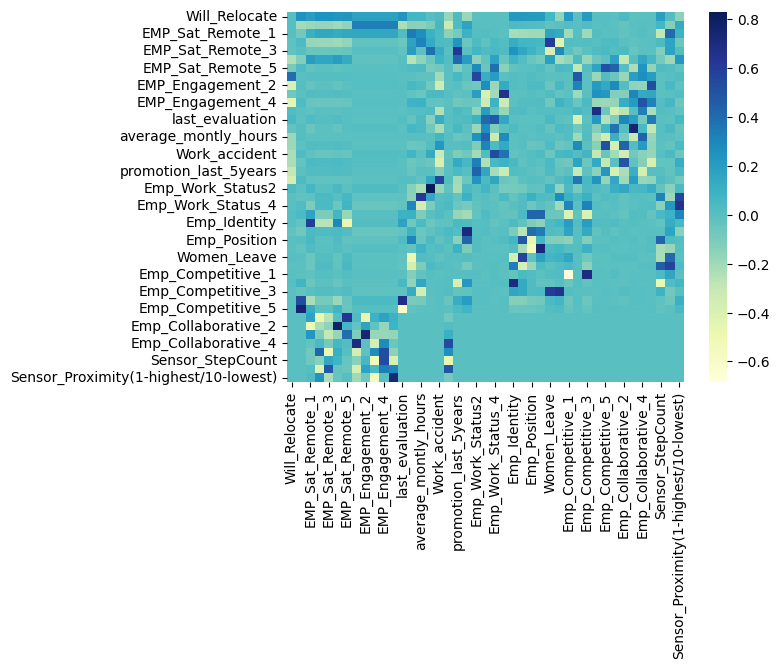

In [20]:
# Visualization w/ seaborn heatmap
import seaborn as sns

sns.heatmap(pca_corr, cmap="YlGnBu")

In [31]:
# Visualization w/ numerical values
masked_pca_corr = pca_corr.where(mask)

In [26]:
pca_corr.style.apply(lambda x: x.map(highlight_values))

,Will_Relocate,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
Will_Relocate,0.003476,0.249075,0.204178,0.252099,0.252099,0.237311,0.242094,0.180106,0.180106,0.180106,0.180106,0.180106,0.237579,0.069636,0.066141,0.002902,0.031126,-0.180106,0.032311,-0.183294,-0.003062,-0.003612,0.000193,-0.003557,0.214750,0.215878,0.209143,0.212209,0.060459,-0.158327,0.209818,-0.000662,0.210468,0.003269,0.003654,-0.001105,0.037962,-0.006081,0.000814,-0.000145,0.186613,0.017932,-0.151954
Percent_Remote,0.001954,-0.210866,-0.188571,-0.174799,-0.174799,-0.195943,-0.154526,0.320463,0.320463,0.320463,0.320463,0.320463,-0.229244,-0.140044,-0.145701,-0.105696,0.059841,-0.320463,0.028022,0.162345,0.003707,0.000004,-0.003347,-0.000068,0.030921,0.029225,0.021064,0.016064,-0.025671,-0.014683,0.018727,-0.003580,0.020360,0.000865,0.003218,-0.005513,-0.034451,-0.002725,0.005691,0.001040,0.064709,-0.133024,0.133346
EMP_Sat_Remote_1,0.003261,-0.076475,0.104146,0.147663,0.147663,0.128681,0.146187,0.148488,0.148488,0.148488,0.148488,0.148488,0.022336,0.343716,0.266597,0.100196,0.033275,-0.148488,-0.090779,0.092308,0.010234,0.016431,0.002072,-0.005213,-0.218106,-0.208479,-0.198863,-0.198056,0.167807,0.135870,-0.200010,0.006779,-0.197942,0.017912,-0.000410,0.000587,-0.023621,-0.007563,0.010661,-0.015152,-0.290512,0.403294,0.086344
EMP_Sat_Remote_2,-0.018038,0.033248,-0.181043,-0.185531,-0.185531,-0.195210,-0.169435,-0.028108,-0.028108,-0.028108,-0.028108,-0.028108,-0.052111,0.178203,0.310499,0.135798,0.032333,0.028108,0.232438,-0.059573,0.031092,-0.018503,0.039517,0.016966,0.121332,0.071655,0.068834,0.057673,0.598229,-0.437842,0.015817,0.011452,0.016312,0.002347,0.030399,0.035115,-0.004070,-0.017242,-0.009567,0.000985,0.036091,0.168343,-0.062682
EMP_Sat_Remote_3,-0.022520,0.003205,-0.047620,-0.048059,-0.048059,-0.051049,-0.043684,0.003700,0.003700,0.003700,0.003700,0.003700,-0.022944,0.204215,-0.014804,0.381414,0.125293,-0.003700,0.626921,-0.011199,0.072159,0.027135,0.048337,0.025990,0.244628,0.154570,0.085378,0.032313,-0.385888,0.289801,-0.009074,-0.064496,-0.009504,0.028994,0.041882,0.018738,0.031608,-0.043393,-0.007606,-0.008566,-0.123454,0.177674,0.014169
EMP_Sat_Remote_4,-0.240968,-0.117992,0.198678,0.158580,0.158580,0.196203,0.132356,-0.019026,-0.019026,-0.019026,-0.019026,-0.019026,0.002996,-0.262972,-0.155749,-0.054169,0.080523,0.019026,0.409996,0.203691,-0.151977,-0.030488,0.175842,-0.041293,0.082273,0.017163,-0.046511,-0.093115,0.190105,-0.227334,-0.169603,0.031296,-0.179929,-0.059770,-0.012709,0.182277,-0.297406,0.010210,0.144167,0.057595,-0.089999,-0.192524,0.219916
EMP_Sat_Remote_5,-0.099005,0.025603,-0.033338,-0.012482,-0.012482,-0.027268,-0.005396,0.000553,0.000553,0.000553,0.000553,0.000553,0.010129,0.025384,0.031086,-0.099070,-0.078163,-0.000553,-0.125870,-0.018589,0.282062,-0.062767,0.380041,-0.143742,-0.027466,-0.008549,-0.001209,0.021075,-0.038472,0.046875,0.036190,-0.297266,0.014446,0.161151,0.504803,0.433538,0.009666,-0.231689,0.243198,-0.163069,0.030681,0.013576,-0.026538
EMP_Engagement_1,0.392976,-0.004531,0.009810,0.011915,0.011915,0.011323,0.011397,0.001847,0.001847,0.001847,0.001847,0.001847,-0.003852,-0.001147,-0.021337,-0.016913,-0.200067,-0.001847,0.051649,-0.004602,0.555389,0.114542,0.202794,-0.008907,0.015682,0.002944,0.023235,0.004248,-0.009484,-0.004447,-0.00